<a href="https://colab.research.google.com/github/sanketchavan5595/Video-Games-sales-analysis/blob/main/Video_Games_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/sanketchavan5595/Video-Games-sales-analysis/main/vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [3]:
df.shape

(16598, 11)

In [4]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
len(df[df['Year'].isnull() | df['Publisher'].isnull()])/ len(df) * 100

1.8496204361971322

In [6]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


**Year has the dtype as float, so we will convert that to int**

In [8]:
df['Year'] = df['Year'].astype(int)

In [9]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')



---



## Variable identification

**Categorical variables**
  * Platform
  * Year
  * Genre
  * Publisher

**Numerical variables**
  * NA_Sales
  * EU_Sales
  * JP_Sales
  * Other_Sales
  * Global_Sales


### Platform

In [10]:
df['Platform'].value_counts().to_dict().keys()

dict_keys(['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC', 'XB', 'GBA', 'GC', '3DS', 'PSV', 'PS4', 'N64', 'SNES', 'XOne', 'SAT', 'WiiU', '2600', 'NES', 'GB', 'DC', 'GEN', 'NG', 'WS', 'SCD', '3DO', 'TG16', 'PCFX', 'GG'])

**There are total of 31 platforms**
**let's take a look at the top five platforms**

In [11]:
platforms = list(df['Platform'].value_counts()[:5].to_dict().keys())
sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
global_sales = []
na_sales = []
eu_sales = []
jp_sales = []
other_sales = []
for platform in platforms:
  global_sales.append(df[df['Platform'] == platform]['Global_Sales'].sum())
  na_sales.append(df[df['Platform'] == platform]['NA_Sales'].sum())
  eu_sales.append(df[df['Platform'] == platform]['EU_Sales'].sum())
  jp_sales.append(df[df['Platform'] == platform]['JP_Sales'].sum())
  other_sales.append(df[df['Platform'] == platform]['Other_Sales'].sum())
  

**Let's plot some graphs to know the sales figures for the top five platform**

In [12]:
explode = [0.1,0.1,0.1,0.1,0.1]
colors = ['lightseagreen', 'mediumpurple', 'aquamarine', 'lawngreen', 'mediumorchid']
def platform_pie(title, sales):
  plt.title(title)
  plt.pie(sales, 
          labels = platforms,
          wedgeprops=dict(width=0.2),
          shadow = True,
          colors = colors, 
          explode = explode, 
          startangle = 90, 
          autopct='%1.1f%%');

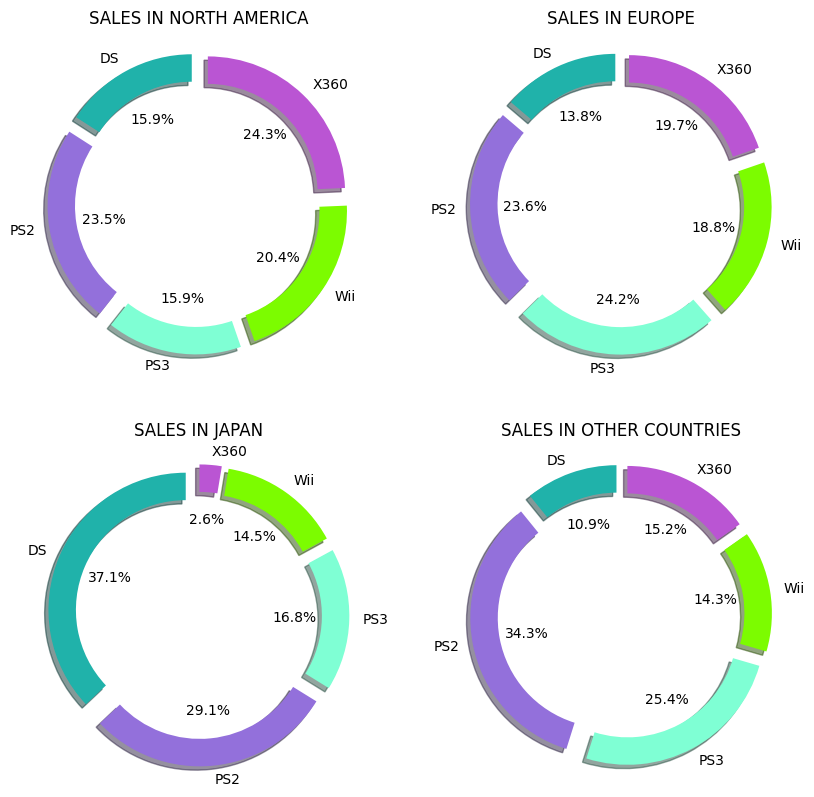

In [13]:
plt.figure(figsize= (10,10), dpi = 100)

plt.subplot(2,2,1)
platform_pie('Sales in North America'.upper(), na_sales)

plt.subplot(2,2,2)
platform_pie('Sales in Europe'.upper(), eu_sales)

plt.subplot(2,2,3)
platform_pie('Sales in Japan'.upper(), jp_sales)

plt.subplot(2,2,4)
platform_pie('Sales in Other countries'.upper(), other_sales)

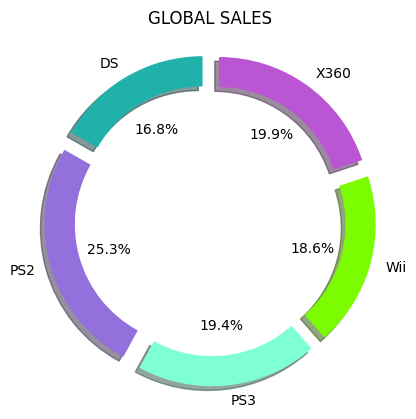

In [14]:
plt.figure(figsize= (5,5), dpi = 100)
platform_pie('Global Sales'.upper(), global_sales)

* NES and GB are two dominant platforms overall
* among these two, NES has more sales than GB in North America and Japan, whereas GB has more sales in Europe



---



### Year

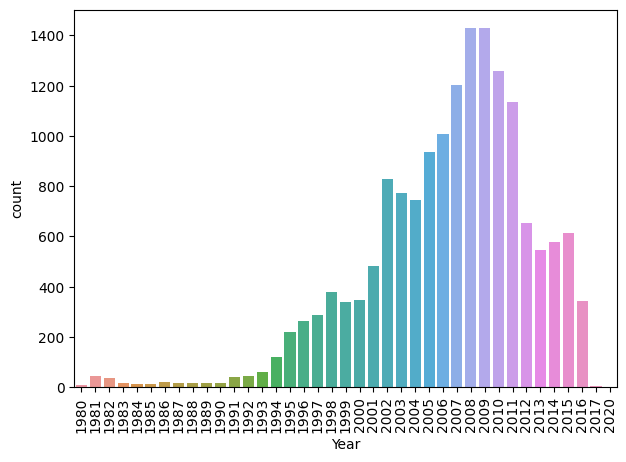

In [15]:
plt.figure(figsize= (7,5), dpi= 100)
plt.xticks(rotation = 90)
sns.countplot(x = 'Year', data = df);

In [16]:
# let's define a function to plot the graphs
def Year_plots(title, sales, color):
  plt.figure(figsize = (7,5), dpi= 100)
  plt.title(title)
  plt.xticks(rotation = 90)
  sns.lineplot(x = 'Year', 
              y = sales,
              color = color, 
              data = df)

**Let's see in which year most sales were made**

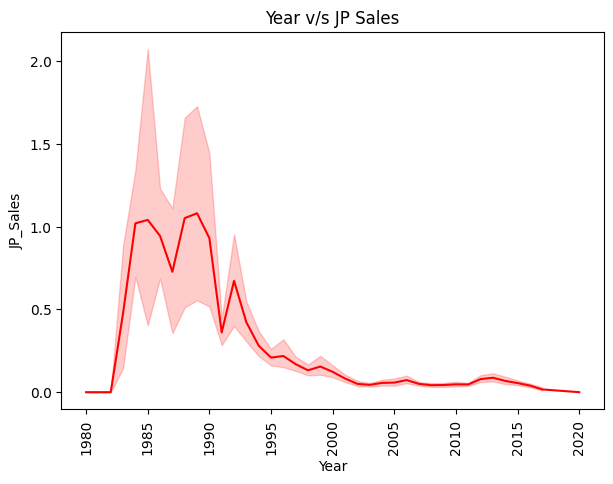

In [17]:
Year_plots('Year v/s JP Sales', 'JP_Sales', 'red')

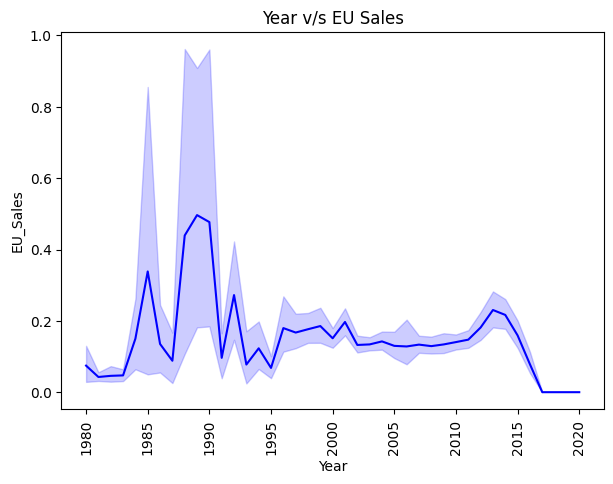

In [18]:
Year_plots('Year v/s EU Sales', 'EU_Sales', 'blue')

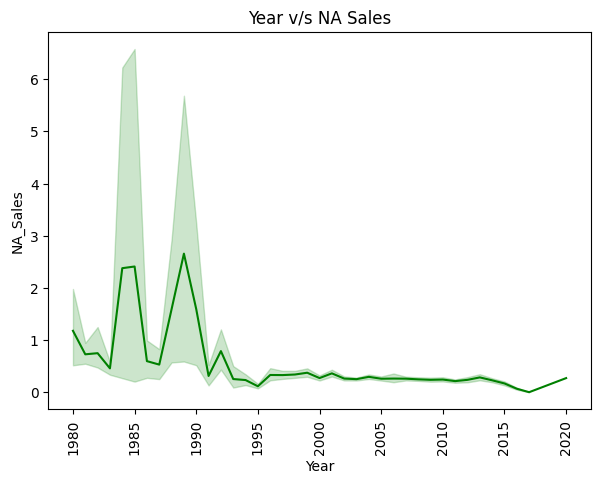

In [19]:
Year_plots('Year v/s NA Sales', 'NA_Sales', 'green')

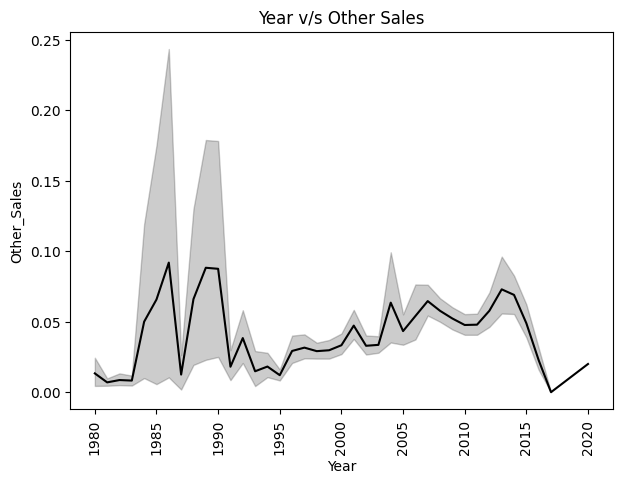

In [20]:
Year_plots('Year v/s Other Sales', 'Other_Sales', 'black')

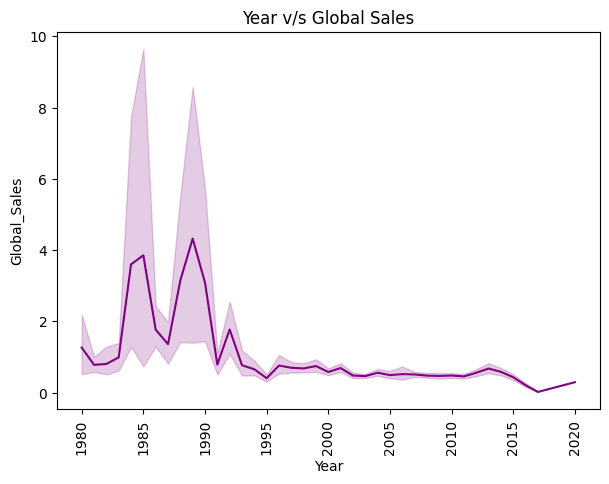

In [21]:
Year_plots('Year v/s Global Sales', 'Global_Sales', 'purple')

**More sales in all the categories were made in the years 1984, 1985, 1988,1989,1990 and 1992**



---



### Genre


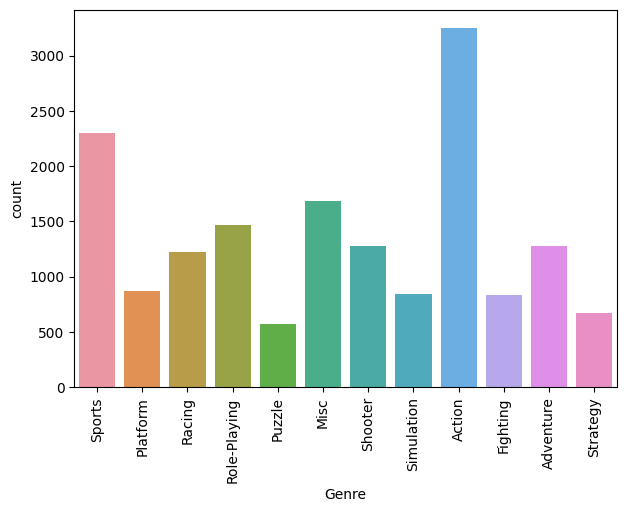

In [22]:
plt.figure(figsize=(7,5), dpi = 100)
plt.xticks(rotation = 90)
sns.countplot(x = 'Genre', data = df);

**We have more number of games from the genres 'Action' and 'Sports' in our dataset**

In [23]:
# function to plot graphs 
def genre_plots(title, sales, palette):
  plt.figure(figsize = (7,5), dpi= 100)
  plt.title(title)
  plt.xticks(rotation = 90)
  sns.barplot(x = 'Genre', 
              y = sales,
              data = df, 
              palette = palette)

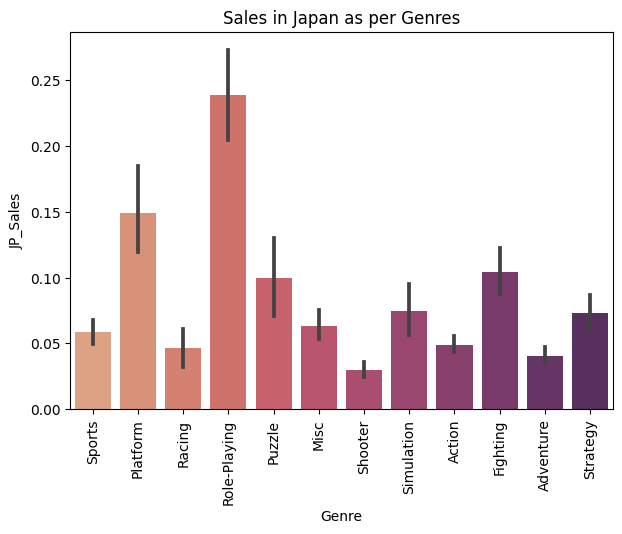

In [24]:
genre_plots('Sales in Japan as per Genres', 'JP_Sales', 'flare')

**Video games of Genre 'Role-Playing' has made the most sales in Japan**

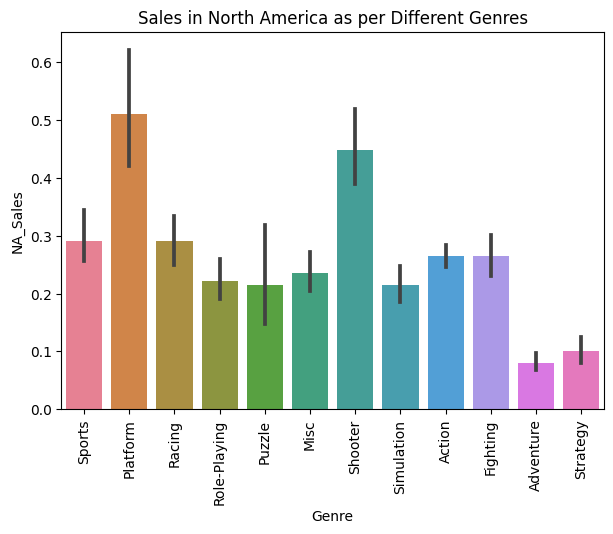

In [25]:
genre_plots('Sales in North America as per Different Genres', 'NA_Sales', 'husl')

**In case of North America, the genres 'Platform' and 'Shooter' as have made more sales than other genres**

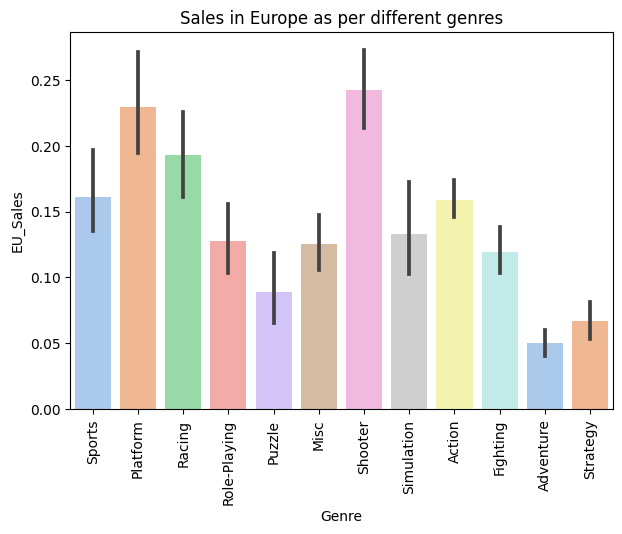

In [26]:
genre_plots('Sales in Europe as per different genres', 'EU_Sales', 'pastel')

**The sales in Europe as similar to sales in North America. 'Platform' and 'Shooter' genre have made more sales than other genres**

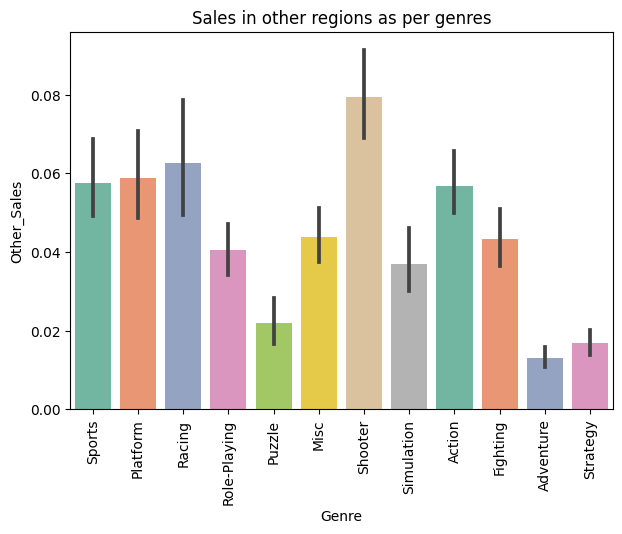

In [27]:
genre_plots('Sales in other regions as per genres', 'Other_Sales', 'Set2')

**In other regions, genres 'Shooter' and 'Racing' have more sales**



---



### Publisher

In [28]:
df['Publisher'].value_counts()[:10]

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
THQ                              712
Nintendo                         696
Sony Computer Entertainment      682
Sega                             632
Take-Two Interactive             412
Name: Publisher, dtype: int64

In [29]:
len(df['Publisher'].unique())

576

**There are 576 publishers in total**

**lets take a look at the total and average global sales figures of top 10 publishers**

In [30]:
# lets take a look at the total and average global sales figures of top 10 publishers
publishers = list(df['Publisher'].value_counts()[:10].to_dict().keys())
total_sales = []
average_sales = []
for publisher in publishers:
  total_sales.append(df[df['Publisher'] == publisher]['Global_Sales'].sum())
  average_sales.append(df[df['Publisher'] == publisher]['Global_Sales'].mean())
my_dict = {
    'publishers': publishers,
    'total_sales': total_sales,
    'average_sales': average_sales
}

publisher_df = pd.DataFrame(my_dict)
publisher_df

,publishers,total_sales,average_sales
0,Electronic Arts,1093.39,0.816572
1,Activision,721.41,0.746801
2,Namco Bandai Games,253.65,0.273330
3,Ubisoft,473.54,0.515839
4,Konami Digital Entertainment,278.56,0.338469
5,THQ,340.44,0.478146
6,Nintendo,1784.43,2.563836
7,Sony Computer Entertainment,607.28,0.890440
8,Sega,270.70,0.428323
9,Take-Two Interactive,399.30,0.969175


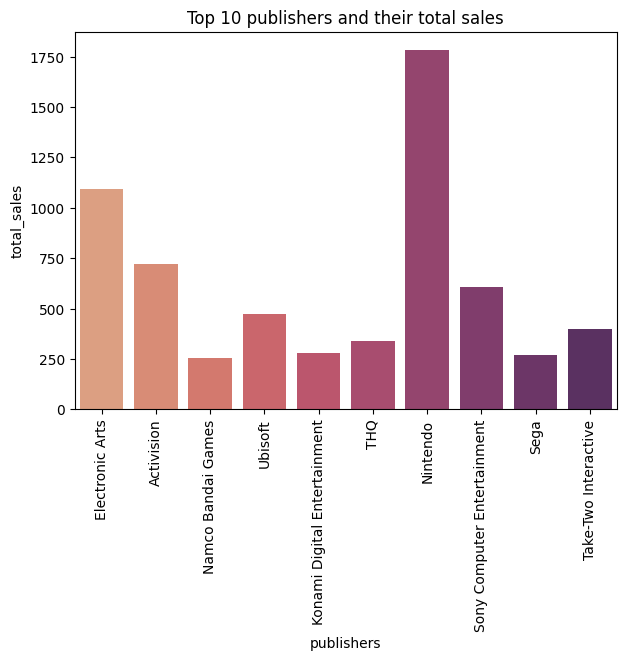

In [31]:
plt.figure(figsize= (7,5), dpi = 100)

plt.title('Top 10 publishers and their total sales')
plt.xticks(rotation = 90)
sns.barplot(x = 'publishers',
            y = 'total_sales', 
            data = publisher_df,
            palette = 'flare');

**Nintendo, Electronic Arts and Activision are the top three companies with highest total sales**

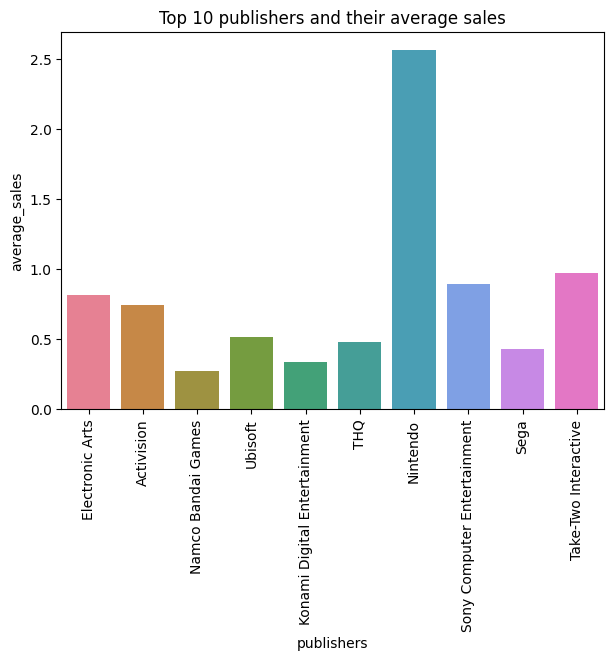

In [32]:
plt.figure(figsize= (7,5), dpi = 100)
plt.title('Top 10 publishers and their average sales')
plt.xticks(rotation = 90)
sns.barplot(x = 'publishers',
            y = 'average_sales', 
            data = publisher_df,
            palette = 'husl');

**Nintendo, Take-Two Interactive and Sony Computer Entertainment are the top three companies with highest average sales**



---



## Numerical Varibles

**Let's take a look at which region has the highest total sales**

In [33]:
sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
total = []
average = []
for sales_col in sales_cols:
  total.append(df[sales_col].sum())
  average.append(df[sales_col].mean())

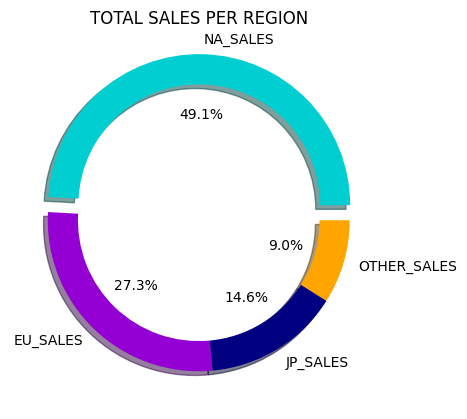

In [34]:
explode = [0.1,0.0,0,0]
plt.figure(figsize=(7,5), dpi = 100)


bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)

colors = ['darkturquoise', 'darkviolet', 'navy', 'orange']
plt.title('Total Sales per region'.upper())
plt.pie(total, 
        labels = [i.upper() for i in sales_cols], 
        explode = explode, 
        shadow = True,
        colors = colors, 
        wedgeprops=dict(width=0.2),
        autopct='%1.1f%%');

**North America region has the highest number of total sales and highest average number of sales as well**



---

---





# Asking and Answering questions

**which are the top-selling games in each genre in each region and globally?**

In [35]:
# let's define a function for it 
# this function will return a dataframe containing the highest saling video games in each genre for a given region 
def highest_genre(df,region_sales): 
  name_list = []
  genre_list = list(df['Genre'].value_counts().to_dict().keys())
  sale_list = []

  for genre in genre_list: 
    name_list.append(df[df['Genre'] == genre][['Name', region_sales]].sort_values(region_sales, ascending = True)['Name'].iloc[-1])
    sale_list.append(df[df['Genre'] == genre][['Name', region_sales]].sort_values(region_sales, ascending = True)[region_sales].iloc[-1])

  gs_dict = {
      'Name': name_list,
      'Genre': genre_list,
      'Sales': sale_list
  }

  return pd.DataFrame(gs_dict, index= list(range(1, len(genre_list) + 1)))

In [36]:
print('The highest saling video games in each genre for every region are: \n'.upper())
regions = ['North America', 'Europe', 'Japan', 'Other regions']
i = 0
for col in sales_cols:
  print(regions[i])
  i = i + 1
  print(highest_genre(df, col))
  print('\n')

THE HIGHEST SALING VIDEO GAMES IN EACH GENRE FOR EVERY REGION ARE: 

North America
                                  Name         Genre  Sales
1                   Grand Theft Auto V        Action   9.63
2                           Wii Sports        Sports  41.49
3                   Kinect Adventures!          Misc  14.97
4             Pokemon Red/Pokemon Blue  Role-Playing  11.27
5                            Duck Hunt       Shooter  26.93
6   Super Mario Land 2: 6 Golden Coins     Adventure   6.16
7                       Mario Kart Wii        Racing  15.85
8                    Super Mario Bros.      Platform  29.08
9                           Nintendogs    Simulation   9.07
10             Super Smash Bros. Brawl      Fighting   6.75
11                     Pokemon Stadium      Strategy   3.18
12                              Tetris        Puzzle  23.20


Europe
                                            Name         Genre  Sales
1                             Grand Theft Auto V        Ac

**Which platforms have sold video games of all the genre types?**

In [37]:
genre_table = pd.pivot_table(df, 
                             index = 'Platform', 
                             columns = ['Genre'],
                             values= ['NA_Sales','JP_Sales', 'EU_Sales', 'Other_Sales', 'Global_Sales'], 
                             aggfunc= np.sum)
genre_table.dropna(inplace = True)
# print(list(genre_table.index))

**The platforms which have sold the video games of all the genres are:**
* 3DS
* DS
* GBA
* GC
* N64
* PC
* PS
* PS2
* PS3
* PS4
* PSP
* PSV
* SAT
* SNES
* Wii
* WiiU
* X360
* XB

**The platforms which made highest sales for each genre in each region and how much**

In [38]:
# this function is similar to highest_genre() function
def highest_platform(df, region_sales):
  name_list = []
  genre_list = list(df['Genre'].value_counts().to_dict().keys())
  sale_list = []

  for genre in genre_list: 
    name_list.append(df[df['Genre'] == genre][['Platform', region_sales]].sort_values(region_sales, ascending = True)['Platform'].iloc[-1])
    sale_list.append(df[df['Genre'] == genre][['Platform', region_sales]].sort_values(region_sales, ascending = True)[region_sales].iloc[-1])

  gs_dict = {
          'Platform': name_list,
          'Genre': genre_list,
          region_sales: sale_list
      }

  return pd.DataFrame(gs_dict, index= list(range(1, len(genre_list) + 1)))

In [39]:
i = 0
print('The platforms which made highest sales for each genre in each region: \n'.upper())
for col in sales_cols:
  print(regions[i])
  i = i + 1
  print(highest_platform(df,col))
  print('\n')

THE PLATFORMS WHICH MADE HIGHEST SALES FOR EACH GENRE IN EACH REGION: 

North America
   Platform         Genre  NA_Sales
1      X360        Action      9.63
2       Wii        Sports     41.49
3      X360          Misc     14.97
4        GB  Role-Playing     11.27
5       NES       Shooter     26.93
6        GB     Adventure      6.16
7       Wii        Racing     15.85
8       NES      Platform     29.08
9        DS    Simulation      9.07
10      Wii      Fighting      6.75
11      N64      Strategy      3.18
12       GB        Puzzle     23.20


Europe
   Platform         Genre  EU_Sales
1       PS3        Action      9.27
2       Wii        Sports     29.02
3        DS          Misc      9.26
4        GB  Role-Playing      8.89
5       PS3       Shooter      5.88
6        PC     Adventure      2.79
7       Wii        Racing     12.88
8        DS      Platform      9.23
9        DS    Simulation     11.00
10      Wii      Fighting      2.61
11       PC      Strategy      2.27
12   

**Most no. of games were sold in the year 2009. let's explore that year**

In [40]:
year_2009_df = df[df['Year'] == 2009] 
year_2009_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
14,15,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
36,37,Call of Duty: Modern Warfare 2,X360,2009,Shooter,Activision,8.52,3.63,0.08,1.29,13.51
45,46,Pokemon HeartGold/Pokemon SoulSilver,DS,2009,Action,Nintendo,4.40,2.77,3.96,0.77,11.90
...,...,...,...,...,...,...,...,...,...,...,...
16540,16543,15 Days,PC,2009,Adventure,DTP Entertainment,0.00,0.01,0.00,0.00,0.01
16551,16554,Sweet Honey Coming,PS2,2009,Adventure,Kadokawa Shoten,0.00,0.00,0.01,0.00,0.01
16577,16580,Damnation,PC,2009,Shooter,Codemasters,0.00,0.01,0.00,0.00,0.01
16586,16589,Secret Files 2: Puritas Cordis,DS,2009,Adventure,Deep Silver,0.00,0.01,0.00,0.00,0.01


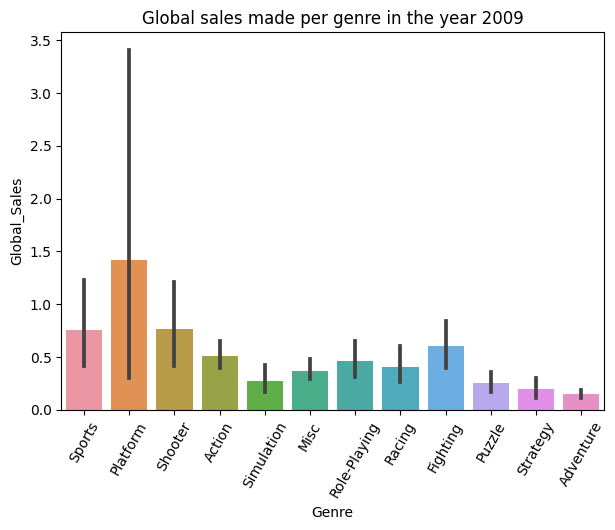

In [86]:
plt.figure(figsize= (7,5), dpi = 100)
plt.title('Global sales made per genre in the year 2009')
plt.xticks(rotation = 60)
sns.barplot(x = 'Genre', 
            y = 'Global_Sales', 
            data = year_2009_df);

**Electronic Arts is the company with most number of games sold in the dataset.**
**Let's explore this company's sales**

In [55]:
df['Publisher'].value_counts()[:10]

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
THQ                              712
Nintendo                         696
Sony Computer Entertainment      682
Sega                             632
Take-Two Interactive             412
Name: Publisher, dtype: int64

In [43]:
ea_df = df[df['Publisher'] == 'Electronic Arts']
ea_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
77,78,FIFA 16,PS4,2015,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
82,83,FIFA Soccer 13,PS3,2012,Action,Electronic Arts,1.06,5.05,0.13,2.01,8.24
83,84,The Sims 3,PC,2009,Simulation,Electronic Arts,0.98,6.42,0.00,0.71,8.11
92,93,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
99,100,Battlefield 3,X360,2011,Shooter,Electronic Arts,4.46,2.13,0.06,0.69,7.34
...,...,...,...,...,...,...,...,...,...,...,...
16339,16342,Command & Conquer Renegade,PC,2002,Shooter,Electronic Arts,0.00,0.01,0.00,0.00,0.01
16384,16387,Poker for Dummies,PC,2008,Misc,Electronic Arts,0.00,0.01,0.00,0.00,0.01
16413,16416,The Godfather (JP sales),X360,2006,Action,Electronic Arts,0.00,0.00,0.01,0.00,0.01
16539,16542,Spore Galactic Adventures,PC,2009,Strategy,Electronic Arts,0.00,0.01,0.00,0.00,0.01


In [63]:
sales_cols
total_sales = []
average_sales = []
for col in sales_cols:
  total_sales.append(ea_df[col].sum())
  average_sales.append(ea_df[col].mean())
print(total_sales)
print(average_sales)

[584.22, 367.37999999999994, 13.979999999999999, 127.63000000000001]
[0.4363106796116489, 0.27436893203883234, 0.010440627333831186, 0.09531740104555693]


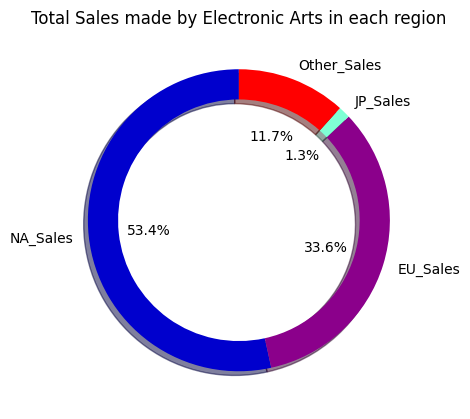

In [87]:
plt.figure(figsize= (7,5), dpi = 100)
plt.title("Total Sales made by Electronic Arts in each region")
colors = ['mediumblue', 'darkmagenta', 'aquamarine', 'red', 'lime']
plt.pie(total_sales, 
        labels = sales_cols,
        wedgeprops=dict(width=0.2),
        shadow = True,
        colors = colors,
        startangle = 90, 
        autopct='%1.1f%%');

In [98]:
ea_df.groupby('Genre')[sales_cols + ['Global_Sales']].mean()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,0.297967,0.241319,0.013681,0.080824,0.633736
Adventure,0.197692,0.126923,0.006154,0.033846,0.365385
Fighting,0.511842,0.227632,0.000789,0.072632,0.811842
Misc,0.262558,0.150930,0.000233,0.044651,0.459070
Platform,0.197500,0.159375,0.003125,0.046250,0.408125
Puzzle,0.380000,0.204286,0.000000,0.065714,0.650000
Racing,0.474969,0.322013,0.007547,0.112579,0.916792
Role-Playing,0.509143,0.325429,0.076000,0.097714,1.008571
Shooter,0.583813,0.403094,0.021079,0.130935,1.138561


In [100]:
ea_df.groupby('Genre')[sales_cols + ['Global_Sales']].sum()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,54.23,43.92,2.49,14.71,115.34
Adventure,2.57,1.65,0.08,0.44,4.75
Fighting,19.45,8.65,0.03,2.76,30.85
Misc,11.29,6.49,0.01,1.92,19.74
Platform,3.16,2.55,0.05,0.74,6.53
Puzzle,2.66,1.43,0.00,0.46,4.55
Racing,75.52,51.20,1.20,17.90,145.77
Role-Playing,17.82,11.39,2.66,3.42,35.30
Shooter,81.15,56.03,2.93,18.20,158.26


* **The genre 'Shooter' has made the highest average sales in each region and globally as well** 
* **The genre 'Sports' has made the highest total sales in every region and globally as well.**
* **No games were sold by Electronic Arts by the genre 'Puzzle' in Japan**
* **In North America, the genre 'Adventure' made the lowest total sales and the genre 'Platform' made the lowest average sales.**
* **In Europe, the genre 'Strategy' made the lowest sales.**

##References
* https://pandas.pydata.org/docs/
* https://numpy.org/doc/
* https://matplotlib.org/stable/contents.html
* https://seaborn.pydata.org/
